<a href="https://colab.research.google.com/github/ibader85/PredictiveAnalytics/blob/main/06_Module_4_KNN_Using_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

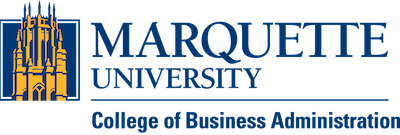

# BUAN 3065: Unlocking Business Insights with Predictive Analytics
# Module 4 KNN Exercise Using Python

Instructor: Dr. Badar Al Lawati

Most data mining packages in Python support the k-fold crossvalidation method, which is less sensitive to how the data is split compared to the holdout method

In Python, we typically split the dataset into two parts: the training set is used to create one or more models, and the validation set (referred to as the test set to be consistent with the term used in Python packages) is employed to assess model performance and select the optimal value for k

In [1]:
import pandas as pd
myData = pd.read_excel('/content/Gym.xlsx', sheet_name = 'Gym_Data')

To partition the data into 60% training and 40% test sets, we use Scikit-Learn’s train_test_split function. Within the training and test sets, data are further partitioned into predictor variables (i.e., X_train and X_test) and target variables (i.e., y_train and y_test)

X_train and X_test include all the columns in myData except the target variable, Enroll; to accomplish this, in the first option of the train_test_split function, we use the drop function with axis = 1, specifying that a column is removed from the dataset

The second option specifies the target variable, myData.Enroll, that will be stored in y_train and y_test. We use the option, test_size = 0.40, to specify the percentage of data reserved for the test set

Finally, the random_state option is used to ensure reproducibility of the random partitioning

By setting the random_state to a fixed value such as 321, we ensure that the data split remains the same every time the code is executed

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(myData.drop('Enroll', axis = 1),
myData.Enroll, test_size = 0.40, random_state = 321)

In [10]:
# Executing the command above partitions 600 cases into the
# training data set and 400 cases into the test data set. To verify
# that the correct number of cases are in each data set, we use the
# len function

len(X_train)

600

In [11]:
len(X_test)

400

We need to standardize the predictor variables, Age, Income, and Hours, before analyzing the data using the KNN technique

The same standardization will be applied to the training, test, and score data

To do this, we use Scikit-Learn’s StandardScaler class,
which is a standardization scaler commonly used in Python, and the fit function to standardize the predictor variables in the data set

We subsequently store the fitted scaler in a variable named dataScaler to be used later

In [12]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
dataScaler = scaler.fit(myData.drop('Enroll', axis = 1))

In [13]:
# We apply the scaler to standardize the predictor variables in both
# the training and test data sets using the transform function

X_train_std = dataScaler.transform(X_train)
X_test_std = dataScaler.transform(X_test)

In [14]:
# Now we import the KNeighborsClassifier class and create a
# variable named KNN_model

from sklearn.neighbors import KNeighborsClassifier
KNN_model = KNeighborsClassifier()

We will evaluate a variety of different possible values of k in our KNN model to find the optimal value of k. Hyperparameters are parameters that are not learned from the data but are set prior to the training process

They are designed to identify the optimal
values for the model’s performance

The value of k is an example of a hyperparameter commonly used in the KNN technique

To define a grid of hyperparameter values, we create a dictionary variable, paramGrid, using the label n_neighbors and a range of values between 1 and 10 (note that in the range function, the latter value is set to 10 + 1 since the end of range is exclusive)

In [16]:
paramGrid = {'n_neighbors': range(1, 10 + 1)}

We then import the Scikit-Learn’s GridSearchCV class and create a variable named search with four options

The first two options are used to specify our model from step f and our grid of hyperparameter from step g

The cv = 10 option specifies that we will use the 10-fold cross-validation method

The last option chooses accuracy as the scoring metric for comparing KNN models with different values of k

Other scoring metric options include precision, recall, and F1-score

In [17]:
from sklearn.model_selection import GridSearchCV

search = GridSearchCV(KNN_model, paramGrid, cv=10, scoring='accuracy')

We use the fit function to develop a KNN model based on the
training data set and the hyperparameter tuning and crossvalidation from the previous steps and save the result in KNN_fit

We then view the results in a data frame using the cv_results_ attribute of KNN_fit

In [18]:
KNN_fit = search.fit(X_train_std, y_train)
pd.DataFrame(KNN_fit.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.002007,0.000688,0.003346,0.000958,1,{'n_neighbors': 1},0.883333,0.883333,0.866667,0.916667,0.916667,0.900000,0.850000,0.833333,0.883333,0.900000,0.883333,0.025820,9
1,0.001338,0.000155,0.002373,0.000078,2,{'n_neighbors': 2},0.900000,0.866667,0.833333,0.900000,0.900000,0.916667,0.866667,0.833333,0.816667,0.866667,0.870000,0.032318,10
2,0.001236,0.000053,0.002287,0.000065,3,{'n_neighbors': 3},0.950000,0.950000,0.900000,0.950000,0.900000,0.950000,0.866667,0.850000,0.866667,0.950000,0.913333,0.039299,5
3,0.001227,0.000026,0.002374,0.000119,4,{'n_neighbors': 4},0.933333,0.950000,0.883333,0.966667,0.900000,0.933333,0.833333,0.866667,0.866667,0.916667,0.905000,0.040173,8
4,0.001210,0.000027,0.002346,0.000107,5,{'n_neighbors': 5},0.950000,0.933333,0.916667,0.966667,0.916667,0.950000,0.883333,0.850000,0.866667,0.950000,0.918333,0.037602,2
5,0.001224,0.000015,0.002322,0.000047,6,{'n_neighbors': 6},0.950000,0.950000,0.900000,1.000000,0.916667,0.966667,0.866667,0.850000,0.866667,0.933333,0.920000,0.046428,1
6,0.001302,0.000146,0.002466,0.000183,7,{'n_neighbors': 7},0.966667,0.933333,0.900000,0.983333,0.916667,0.950000,0.850000,0.883333,0.850000,0.950000,0.918333,0.044378,3
7,0.001316,0.000127,0.002540,0.000164,8,{'n_neighbors': 8},0.983333,0.950000,0.866667,0.966667,0.883333,0.933333,0.850000,0.850000,0.866667,0.933333,0.908333,0.047871,6
8,0.001258,0.000077,0.002458,0.000128,9,{'n_neighbors': 9},0.966667,0.933333,0.866667,0.950000,0.900000,0.950000,0.850000,0.866667,0.850000,0.933333,0.906667,0.042947,7
9,0.001318,0.000161,0.002557,0.000329,10,{'n_neighbors': 10},0.983333,0.900000,0.883333,0.966667,0.916667,0.966667,0.850000,0.866667,0.866667,0.933333,0.913333,0.045216,4


To make the results clearer, we sort the output based on accuracy ranking (stored in the rank_test_score column) using the sort_values function to only display the most relevant results, including the value of k, average accuracy rate, and performance rank of the model

In [20]:
pd.DataFrame(KNN_fit.cv_results_).sort_values('rank_test_score')[['param_n_neighbors', 'mean_test_score', 'rank_test_score']]

,param_n_neighbors,mean_test_score,rank_test_score
5,6,0.920000,1
4,5,0.918333,2
6,7,0.918333,3
9,10,0.913333,4
2,3,0.913333,5
7,8,0.908333,6
8,9,0.906667,7
3,4,0.905000,8
0,1,0.883333,9
1,2,0.870000,10


The param_n_neighbors column shows the value of k
used in each model

The mean_test_score column displays the average accuracy rate across all cross-validation samples

Finally, the rank_test_score column ranks the KNN models in terms of the average accuracy measure

As you can see from the result, the KNN model with k = 6 has the highest average accuracy, 0.92, whereas k = 2 has the lowest average accuracy (0.87)

Therefore, based on the cross-validation results, the optimal k for our KNN model is 6

In [21]:
# The optimal value for k can also be obtained by using the best_estimator_ attribute

KNN_fit.best_estimator_

KNeighborsClassifier(n_neighbors=6)

To assess the performance of the KNN model on an unseen data
set, we apply the model, which uses k = 6, to the test data set

The predicted class memberships are saved in a variable named testPredictions

In [22]:
testPredictions = KNN_fit.predict(X_test_std)

We then use Scikit-Learn’s confusion_matrix function to compare the actual class memberships of the test data cases (y_test) with the predicted class memberships (testPredictions)

In [23]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, testPredictions)

array([[226,  24],
       [ 19, 131]])

The code produces a simple confusion matrix in an array format

Alternatively, we can visualize the confusion matrix using Scikit-Learn’s ConfusionMatrixDisplay class and Matplotlib’s pyplot module, which is designed for creating plots

The first three options specify our KNN model, predictor variables of the test data, and target variable of the test data. The last option specifies that the blue colormap would be used for color-coding the cells in the confusion matrix

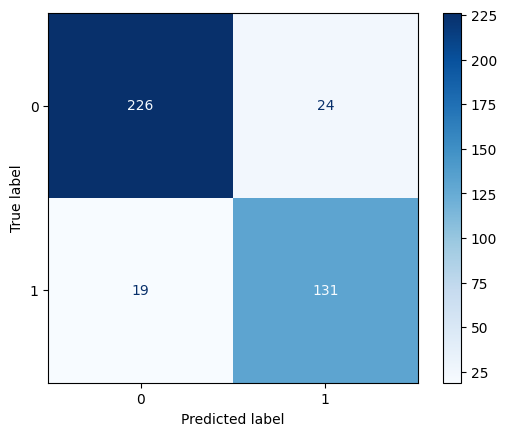

In [24]:
from sklearn.metrics import ConfusionMatrixDisplay

import matplotlib.pyplot as plt

ConfusionMatrixDisplay.from_estimator(KNN_fit, X_test_std, y_test, cmap = plt.cm.Blues);

In [25]:
# To compute the overall accuracy rate, we use Scikit-Learn’s accuracy_score function

from sklearn.metrics import accuracy_score
accuracy_score(y_test, testPredictions)

0.8925

To obtain the other common performance measures, we use
Scikit-Learn’s classification_report function and specify the label for the target class (Class 1) to be “Enrolled” and the label for the nontarget class (Class 0) to be “Did Not Enroll”

In [26]:
from sklearn.metrics import classification_report
print(classification_report(y_test, testPredictions, target_names = ['Did Not Enroll', 'Enrolled'], digits = 4))

                precision    recall  f1-score   support

Did Not Enroll     0.9224    0.9040    0.9131       250
      Enrolled     0.8452    0.8733    0.8590       150

      accuracy                         0.8925       400
     macro avg     0.8838    0.8887    0.8861       400
  weighted avg     0.8935    0.8925    0.8928       400



Note that for a binary classification problem such as this one, sensitivity is represented by recall for the target class and specificity is represented by recall for the nontarget class

Therefore, the sensitivity and specificity of our KNN model are 0.8733 and 0.9040, respectively

When asked to report precision, we usually only report the precision for the target class, and in this case, 0.8452

To evaluate the predictive performance of the KNN model, we
can compare its performance measures to those of the naïve rule, where all cases are classified into the predominant class

Because there are 150 target class (Enrolled) cases and 250 nontarget class (Did not enroll) cases among the 400 test data cases, the naïve rule would classify all cases into the nontarget class and produce an accuracy rate of 250 ÷ 400 = 0.625, sensitivity of 0, and specificity of 1

Therefore, the KNN model shows better predictive performance than the naïve rule does, especially if the goal is to identify target class cases

Remember the choice of the cutoff value can influence the confusion matrix and the resulting performance measures

By default, Scikit-Learn uses 0.5 as the cutoff value for binary choice models

The analyst may choose to increase or decrease the cutoff value to classify fewer or more observations into the target class due to asymmetric misclassification costs or uneven class distributions

Sometimes we use the proportion of target class cases in the data as the cutoff value

In this example, the opportunity cost of missing a potential gym member who would have purchased a gym membership is likely to be higher than the cost of reaching out to a potential customer who ends up not purchasing a gym membership

Furthermore, among the 1,000 past open house attendees in the data set 403 purchased gym membership suggesting that the probability of an open house attendee purchasing the membership is 403 ÷ 1000 = 0.403 instead of the default probability of 0.5

In this case, the manager of the fitness center may reduce the cutoff value to a lower value than 0.5 in order to classify more cases into the target class in order to achieve a higher sensitivity value

This is illustrated in step p

To evaluate the predictive performance of the KNN model using a different cutoff value, we first compute the probability of each case belonging to the target classes instead of its class membership

The predict_proba function can be used for this purpose

The predicted probability values are saved in a variable named testPredictionProbs

We then take a look at the probabilities for the first 10 cases

In [27]:
testPredictionProbs = KNN_fit.predict_proba(X_test_std)
testPredictionProbs[:10,]

array([[0.33333333, 0.66666667],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.5       , 0.5       ],
       [0.83333333, 0.16666667],
       [0.83333333, 0.16666667],
       [0.5       , 0.5       ],
       [0.        , 1.        ]])

The first column in the output shows the probabilities of the cases belonging to Class 0 (Did not enroll), while the second column lists the probabilities of the cases
belonging to Class 1 (Enrolled)

To determine class memberships using a cutoff value other than the default probability of 0.5 (e.g., 0.403, in order to accurately classify more Class 1 cases), we compare the values in the second column to the new cutoff value

We use the NumPy’s where function to test which values in the second column are greater than the cutoff of 0.403; values that are greater will be scored a 1 and values that are not will be scored a 0

The second column of the predicted probability data frame is referenced via the slice [:, 1], which indicates all rows in the second column

Recall that in Python, since the first column is indexed by a 0, the second column is represented by 1

We store the resulting class memberships in a new variable named testPredsCustomCutoff and then view the predicted class memberships of the first 10 cases

In [28]:
import numpy as np
testPredsCustomCutoff = np.where(testPredictionProbs[:, 1] > 0.403, 1, 0)
testPredsCustomCutoff[:10]

# will show us the class memberships for the first 10 cases

array([1, 1, 0, 0, 0, 1, 0, 0, 1, 1])

In [29]:
# To construct a confusion matrix using the new cutoff value of
# 0.403, we again use the confusion_matrix function as in step m.
# We then compute the accuracy rate, sensitivity, and specificity as
# in steps n and o

confusion_matrix(y_test, testPredsCustomCutoff)
accuracy_score(y_test, testPredsCustomCutoff)
print(classification_report(y_test, testPredsCustomCutoff,
target_names = ['Did Not Enroll', 'Enrolled'], digits = 4))

# This will provide the performance measures of the KNN model using the cutoff value of 0.403

                precision    recall  f1-score   support

Did Not Enroll     0.9556    0.8600    0.9053       250
      Enrolled     0.8000    0.9333    0.8615       150

      accuracy                         0.8875       400
     macro avg     0.8778    0.8967    0.8834       400
  weighted avg     0.8972    0.8875    0.8889       400



To create a cumulative lift chart, we create a dataframe containing the actual class memberships (0 or 1) and the predicted probabilities for the target/positive class (1)

The dataframe is then sorted in descending order of predicted probabilities, and we compute the cumulative gain metrics by calculating the cumulative sum of the actual positives and normalizing it by the total positives

Additionally, we calculate the percentage of the population for plotting

Finally, we plot the cumulative lift chart, comparing the model’s performance with the baseline random performance

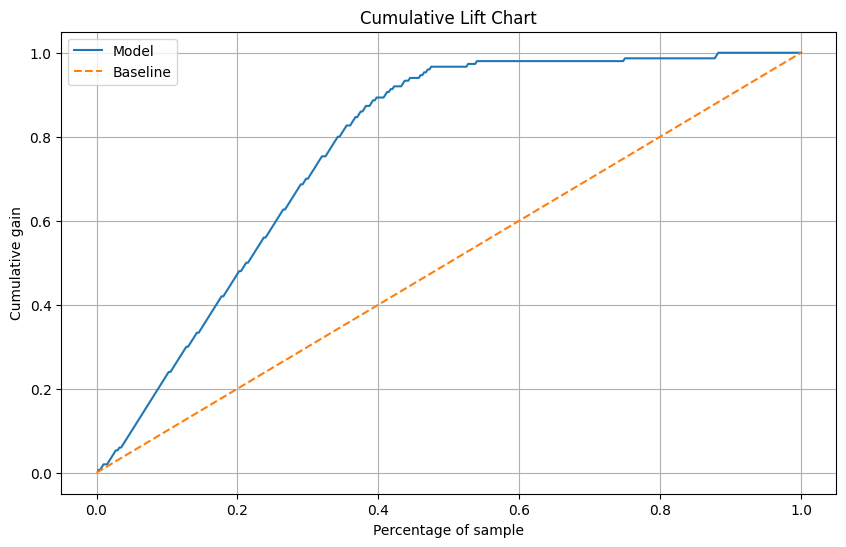

(None, None)

In [33]:
import matplotlib.pyplot as plt
testOutcomes = pd.DataFrame({'Actuals': y_test, 'Probs': testPredictionProbs[:,1]})
data = testOutcomes.sort_values(by='Probs', ascending=False).reset_index(drop=True)
data['cumulative_positives'] = data['Actuals'].cumsum()
total_positives = data['Actuals'].sum()
data['cumulative_gain'] = data['cumulative_positives'] / total_positives
data['percentage_population'] = (np.arange(1, len(data) +
1) / len(data))
plt.figure(figsize=(10, 6))
plt.plot(data['percentage_population'],
data['cumulative_gain'], label='Model')
plt.plot([0, 1], [0, 1], linestyle='--', label='Baseline')
plt.title('Cumulative Lift Chart'), plt.xlabel('Percentage of sample'), plt.ylabel('Cumulative gain'), plt.legend(),
plt.grid(), plt.show()

the chart is indicating that the KNN model performs considerably better than the baseline model in terms of predicting whether or not an open house attendee will purchase a gym membership

To generate a decile-wise lift chart, we need to first construct the cumulative gains table

We first create a Pandas DataFrame, testOutcomes, which consists of two columns, Actuals and Probs

The Actuals column contains the actual class memberships (y_test), and the Probs column contains the predicted probabilities of the cases belonging to the target class (the second column from the testPredictionProbs array)

In [36]:
testOutcomes = pd. DataFrame({'Actuals': y_test, 'Probs': testPredictionProbs[:, 1]})

In [38]:
# We use the qut function to bin the predicted probabilities into 10 quantiles (q = 10)
# The duplicates = 'drop' option removes any duplicate bins
# This effectively divides the data in testOutcomes into deciles based on the predicted probabilities

cuts = pd.qcut(testOutcomes.Probs, q = 10, duplicates = 'drop')

We then calculate the lift for each quantile

Lift is a measure of how much better a predictive model is at identifying target class cases compared to a random selection

It is calculated as the ratio of the percentage of actual target class cases in each quantile to the overall percentage of actual target class cases in the entire test data set

In [41]:
lifts = (testOutcomes.groupby(cuts)['Actuals'].sum() / cuts.value_counts()) / np.mean(testOutcomes.Actuals)

/tmp/ipython-input-942622017.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  lifts = (testOutcomes.groupby(cuts)['Actuals'].sum() / cuts.value_counts()) / np.mean(testOutcomes.Actuals)


Finally, we create a new DataFrame, plotDat, to store the lift values we calculated, rounded to three decimal places, and the count of cases in each quantile

We also add the following two columns to the DataFrame: Cumulative N, which calculates the cumulative sum of N values in reverse order (hence, np.flip(plotDat.N)), and Cumulative Percentile, which calculates the cumulative percentile by dividing the cumulative count by the total number of cases, rounded to the nearest integer

In [46]:
plotDat = pd.DataFrame({'Lift': np.round(lifts, 3), 'N': cuts.value_counts()})
plotDat['Cumulative N'] = np.cumsum(np.flip(plotDat.N))
plotDat['Cumulative Percentile'] = round (plotDat['Cumulative N'] / len(testOutcomes) * 100, 0) .astype('int')
plotDat

,Lift,N,Cumulative N,Cumulative Percentile
Probs,,,,
"(-0.001, 0.167]",0.063,210,400,100
"(0.167, 0.5]",1.067,35,190,48
"(0.5, 0.833]",2.133,65,155,39
"(0.833, 1.0]",2.341,90,90,22


The table shows the cumulative gains table that resulted from running the code in the previous step

Although we try to divide the cases into 10 groups based on their probabilities of belonging to the target class, in situations where there are overlapping bins (bins with the same boundary values), these bins are combined

This is the case in our example: four groups were created in the cumulative gains table

When inspecting the cumulative gains table, we start from the groups with the highest predicted probabilities, which is the group with predicted probability values ranging from 0.833 to 1.0 in our example

The cumulative gains table shows that there are 90 cases in this group, which accounts for 22% of the overall number of test data cases

The lift value, 2.341, suggests that the top 22% (or 90) of the test data cases with the highest predicted probabilities of belonging to the target class (Enrolled) capture 2.341 times as many actual target class cases, compared to randomly selecting 22% (or 90) of the test data cases

Higher lift values for the first few groups with the highest predicted probabilities is an indication of effectiveness of the model

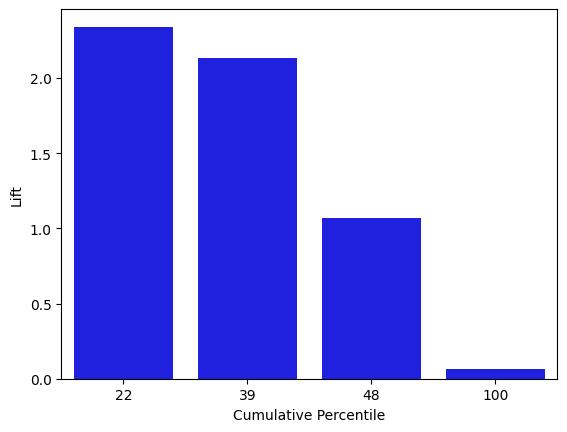

In [47]:
# We now create the decile-wise lift chart to visualize the information from the cumulative gains table using Seaborn's barplot function

import seaborn as sns
sns.barplot(y = 'Lift', x= 'Cumulative Percentile', data = plotDat, color = 'blue');

To create a receiver operating characteristic (ROC) curve for the KNN model, we first import the Scikit-Learn's RocCurveDisplay class

We then create a new 8 inches by 8 inches figure and axis for plotting using Matplotlib

We also plot a diagonal dashed line in black on the plot

This line represents the ROC curve of a random classifier, which has an area under the curve (AUC) value of 0.5

It serves as a reference line to compare the performance of the KNN model

Using Scikit-Learn's RocCurveDisplay.from_ estimator function, we generate the ROC curve and plot it in the Matplotlib axis created earlier

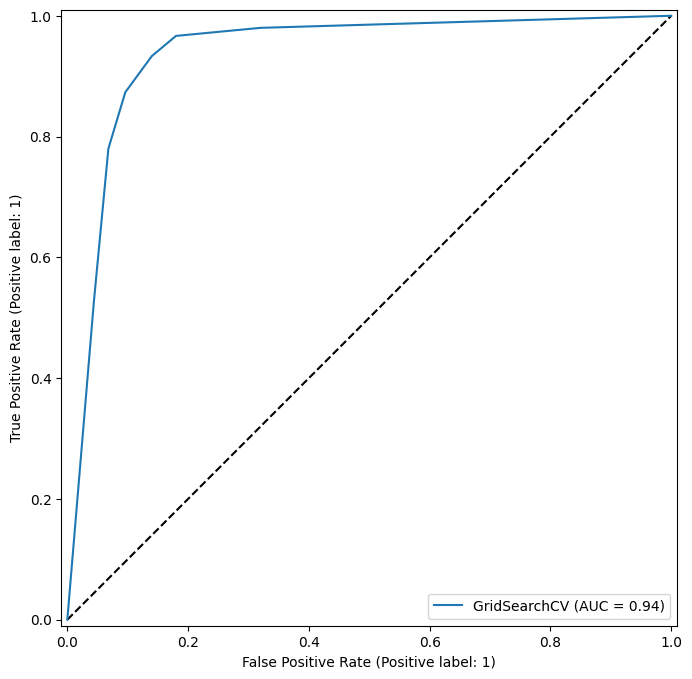

In [50]:
from sklearn.metrics import RocCurveDisplay
fig, ax = plt.subplots(figsize = (8, 8))
ax.plot(ax.get_xlim(), ax.get_ylim(), ls = '--', c = 'k')
RocCurveDisplay. from_estimator (KNN_fit, X = X_test_std, y = y_test, ax = ax);

The KNN model performs substantially better than the baseline model (shown as the dashed diagonal line) in terms of both sensitivity and specificity across all cutoff values

The area under the ROC curve, or AUC, is very high (0.94), indicating that the KNN model performs very well in predicting the gym enrollment among open house attendees

Alternatively, we can use the Scikit-Learn's roc _auc_score function with the actual class memberships (y_test) and the predicted probabilities of belonging to the target class (testPredictionProbs) to compute the AUC value

In [52]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, testPredictionProbs[:, 1])

# Will show an AUC value with more fractional digits (0.9376266666666666)

np.float64(0.9376266666666666)

To score the records of the potential gym members, we import data from the Gym_Score worksheet of the Gym data file into a DataFrame and name it myScoreData

Because our KNN_model was developed using standardized values, we need to apply the same standardization procedure to the new data

We use the dataScaler created earlier in step d to standardize myScoreData and name it myScoreData_std

Finally, we use the predict function to apply our model, KNN_fit, for scoring the new records and store the values in KNN_ Scores

In [53]:
myScoreData = pd.read_excel('/content/Gym.xlsx', sheet_name = 'Gym_Score')
myScoreData_std = dataScaler. transform(myScoreData)
KNN_Scores = KNN_fit. predict(myScoreData_std)

Once scoring is finished, the KNN_Scores object will contain classification results (whether or not the potential gym members are likely to enroll: yes = 1 and no = 0)
We then add these results to our existing myScoreData as a new column, KNN_Score, and view the first and last few results using the head and tail functions

In [58]:
myScoreData['KWN_Score'] = KNN_Scores
myScoreData.head ()

,Age,Income,Hours,KWN_Score
0,22,33000,5,0
1,23,65000,9,0
2,23,17000,15,0
3,24,21000,16,0
4,64,109000,20,1


In [57]:
myScoreData.tail()

,Age,Income,Hours,KWN_Score
18,54,87000,4,1
19,24,45000,7,0
20,45,105000,17,0
21,25,66000,3,0
22,51,88000,6,1
